<a href="https://colab.research.google.com/github/yimuzy/20s_ma573/blob/master/PRO/5_8_STFinished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.a) loss distribution based on multivariate normal distribution**

In [162]:
!pip install yahoo-finance
!pip install pandas_market_calendars

import pandas as pd
import pandas_market_calendars as pmc
import pandas_datareader.data as drd
import numpy as np
import seaborn as sns
from pandas_datareader import data as pdr

In [0]:
AAPL= drd.get_data_yahoo('AAPL','01/01/2012','04/17/2020',interval='d')
TSLA= drd.get_data_yahoo('TSLA','01/01/2012','04/17/2020',interval='d')
GILD= drd.get_data_yahoo('GILD','01/01/2012','04/17/2020',interval='d')
MELI= drd.get_data_yahoo('MELI','01/01/2012','04/17/2020',interval='d')
MSFT= drd.get_data_yahoo('MSFT','01/01/2012','04/17/2020',interval='d')
DIS= drd.get_data_yahoo('DIS','01/01/2012','04/17/2020',interval='d')
NVDA= drd.get_data_yahoo('NVDA','01/01/2012','04/17/2020',interval='d')
TCO= drd.get_data_yahoo('TCO','01/01/2012','04/17/2020',interval='d')
MMM= drd.get_data_yahoo('MMM','01/01/2012','04/17/2020',interval='d')
INCY= drd.get_data_yahoo('INCY','01/01/2012','04/17/2020',interval='d')
IBM= drd.get_data_yahoo('IBM','01/01/2012','04/17/2020',interval='d')
EPC= drd.get_data_yahoo('EPC','01/01/2012','04/17/2020',interval='d')
SPY= drd.get_data_yahoo('SPY','01/01/2012','04/17/2020',interval='d')
YELP= drd.get_data_yahoo('VEA','01/01/2012','04/17/2020',interval='d')
VTI= drd.get_data_yahoo('VTI','01/01/2012','04/17/2020',interval='d')
yelp_1= drd.get_data_yahoo('YELP','01/01/2012','04/17/2020',interval='d')
SPY= drd.get_data_yahoo('SPY','01/01/2012','04/17/2020',interval='d')

In [3]:
SPY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,108.037117
2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,108.206604
2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,108.494698
2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,108.215065
2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,108.477776
...,...,...,...,...,...,...
2020-04-13,277.510010,271.410004,277.140015,275.660004,114839100.0,275.660004
2020-04-14,284.899994,275.510010,280.980011,283.790009,134143400.0,283.790009
2020-04-15,283.940002,275.459991,277.570007,277.760010,121775000.0,277.760010


In [0]:
import pandas_market_calendars as mcal
nyse = mcal.get_calendar('NYSE')
tradingdays = nyse.schedule(start_date='2012-01-01', end_date='2020-04-17')
tradingdays1=tradingdays.index

In [0]:
nan_date=tradingdays.index[:41]

ADD= pd.DataFrame(columns=['High','Low','Open','Close','Volume','Adj Close'],index=nan_date)
tickers=['SPY','YELP']
port = pdr.get_data_yahoo(tickers, start="2012-01-01", end="2020-04-17")['Adj Close']
log_port=np.log(port)

In [6]:
for i in range(41):
  time_win=log_port.iloc[41-i:1047-i]['YELP']
  log_return=[]
  for j in range(1005):
    log_return.append(time_win[j+1]-time_win[j])
  u=np.mean(log_return)
  var=np.var(log_return)
  a=np.random.normal(u,var,1)
  log_port.iloc[40-i]['YELP']=log_port.iloc[41-i]['YELP']-a
yelp_update=np.exp(log_port)

for i in range(41):
  ADD.iloc[i]['Adj Close']=yelp_update.iloc[i]['YELP']

for i in range(2045):
  YELP.iloc[i+41]['Adj Close']=yelp_1.iloc[i]['Adj Close'].item()
for i in range(41):
  YELP.iloc[i]['Adj Close']=ADD.iloc[i]['Adj Close'].item()

YELP

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,31.570000,31.250000,31.260000,31.450001,8276700.0,25.165395
2012-01-04,31.350000,31.070000,31.290001,31.270000,2609200.0,25.222378
2012-01-05,30.850000,30.590000,30.770000,30.820000,2095900.0,25.214946
2012-01-06,30.730000,30.330000,30.730000,30.459999,2044000.0,25.169600
2012-01-09,30.620001,30.320000,30.610001,30.530001,1652200.0,25.232457
...,...,...,...,...,...,...
2020-04-13,34.740002,34.200001,34.669998,34.500000,34969000.0,19.139999
2020-04-14,35.369999,34.970001,35.029999,35.119999,21511100.0,19.510000
2020-04-15,34.240002,33.869999,34.060001,33.980000,22435900.0,18.590000


In [7]:
stock_list=[AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI]
index_list=['AAPL','TSLA','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','YELP','VTI']
log_price=[]
for i in range(15):
  stock_log=np.log(stock_list[i]['Adj Close'])
  log_price.append(stock_log)
log_price[0]

Date
2012-01-03    3.931726
2012-01-04    3.937086
2012-01-05    3.948127
2012-01-06    3.958526
2012-01-09    3.956938
                ...   
2020-04-13    5.610387
2020-04-14    5.659656
2020-04-15    5.650487
2020-04-16    5.658402
2020-04-17    5.644740
Name: Adj Close, Length: 2086, dtype: float64

In [8]:
var_list=[]
for i in range(15):
  a=log_price[i].var()
  var_list.append(a)
sort_list=var_list.copy()
sort_list.sort()
choose_list=sort_list[-4:]
name_list=[]
for i in range(4):
  a=choose_list[i]
  b=var_list.index(a)
  name_list.append(index_list[b])
name_list

['INCY', 'MELI', 'TSLA', 'NVDA']

In [9]:
weektime=[]
for i in tradingdays1:
  if i.weekday() == 2:
    weektime.append(i)

nan_list=[]
nan_index=[]
for i in range(422):
  if weektime[i+1]-weektime[i] != pd.Timedelta('7 days'):
    nan_list.append(weektime[i])
    nan_index.append(i)


#weektime: wednesday date list
#weektime[-1]
print(nan_index)
print(nan_list)
#找到缺失tradingday的周三 以周二数据代替

[25, 101, 335, 356, 410]
[Timestamp('2012-06-27 00:00:00', freq='C'), Timestamp('2013-12-18 00:00:00', freq='C'), Timestamp('2018-06-27 00:00:00', freq='C'), Timestamp('2018-11-28 00:00:00', freq='C'), Timestamp('2019-12-18 00:00:00', freq='C')]


In [10]:
p1=pd.Timestamp(2012,7,3)
p2=pd.Timestamp(2013,12,24)
p3=pd.Timestamp(2013,12,31)
p4=pd.Timestamp(2018,7,3)
p5=pd.Timestamp(2018,12,4)
p6=pd.Timestamp(2019,12,24)
p7=pd.Timestamp(2019,12,31)
weektime.insert(26,p1)
weektime.insert(103,p2)
weektime.insert(104,p3)
weektime.insert(339,p4)
weektime.insert(361,p5)
weektime.insert(416,p6)
weektime.insert(417,p7)
len(weektime)

433

In [0]:
from datetime import date
total_num=len(tradingdays)
date_list=[]
for i in range(total_num-1):
  if tradingdays.index[i].day > tradingdays.index[i+1].day:
    date_list.append(tradingdays.index[i])

#date_list 每个月最后一个交易日列表
#date_list

In [0]:
index_list=['AAPL','TSLA','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','YELP','VTI']

def new_portfolio():
    res = pd.DataFrame(columns=['Share', 'Adj Close'],index=pd.Series(index_list))
    return res

my_port = new_portfolio()
#my_port portfolio模型

In [0]:
update_list=[] #所有天的portfolio

for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc['2012-01-03']['Adj Close']
update_list.append(my_port)

for j in range(len(date_list)):
  b=date_list[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  update_list.append(my_port)

#更新所有portfolio adjclose这一列


In [0]:
for i in range(len(index_list)):
    a=index_list[i]
    update_list[0].loc[a]['Share']=(400000/15)/update_list[0].loc[a]['Adj Close']

def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a]['Share']*portfolio2.loc[a]['Adj Close']
  return res

for i in range(len(update_list)-1):
  to_value=total_value(update_list[i],update_list[i+1])
  for j in range(len(index_list)):
    a=index_list[j]
    update_list[i+1].loc[a]['Share']=(to_value/15)/update_list[i+1].loc[a]['Adj Close']

#更新所有portfolio share这一列
#update——list 包含所有的portfolio zaiyuemojiaoyiri

#截止到此，我们获取了每月最后一日的portfolio的信息

In [15]:
week_stock=[] #所有Wednesday的portfolio

for j in range(len(weektime)):
  b=weektime[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  week_stock.append(my_port)
len(week_stock)

433

In [0]:
m=0
for i in range(len(week_stock)):
  if weektime[i].month <= date_list[m].month:
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']
  else:
    m+=1
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']

#week_stock all updated

In [17]:
len(week_stock)
len(weektime)

433

In [18]:
weektime[208]

Timestamp('2015-12-30 00:00:00', freq='C')

In [19]:
a=weektime[0]
AAPL.loc[a]['Adj Close']
a

Timestamp('2012-01-04 00:00:00', freq='C')

In [0]:
stock_list=[AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI]
log_return=[]
for j in range(15):
  price_list=[]
  for i in range(len(weektime)):
    b=weektime[i]
    a=stock_list[j].loc[b]['Adj Close']
    price_list.append(a)
  stock_log=np.log(price_list)
  len_num=len(stock_log)
  for j in range(len_num-1):
    stock_log[j]=stock_log[j+1]-stock_log[j]
  log_return.append(stock_log[:-1])
#log_return for 15 equities

现在以四年的时间长度rolling来estimate multivariate normal的参数 再compute新log return 再算新loss 也就是我们算的是2016年第一个周三到2020年三月份最后一个周三 computed losses.

In [21]:
u_list=[]
for j in range(225):
  u=[]
  for i in range(15):
    a=log_return[i][j:(j+209)]
    u.append(a.mean())
  u_list.append(u)
len(u_list)

225

In [22]:
cov_list=[]
for j in range(225):
  df_temp={}
  for i in range(15):
    df_temp[index_list[i]]=log_return[i][j:(j+209)]
  df = pd.DataFrame(df_temp)
  cov_mat=df.cov()  
  cov_list.append(cov_mat)

cov_list[0]

,AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,YELP,VTI
AAPL,0.001226,0.000265,0.000256,0.000636,0.000319,0.000299,0.000263,0.000155,0.000254,0.000332,0.000225,0.000296,0.000299,0.000468,0.000304
TSLA,0.000265,0.004452,0.000740,0.001214,0.000600,0.000514,0.000554,0.000089,0.000314,0.000956,0.000243,0.000156,0.000391,0.001640,0.000421
GILD,0.000256,0.000740,0.001728,0.000786,0.000225,0.000371,0.000184,0.000249,0.000298,0.000901,0.000107,0.000233,0.000307,0.000829,0.000320
MELI,0.000636,0.001214,0.000786,0.003159,0.000484,0.000535,0.000687,0.000206,0.000454,0.000581,0.000383,0.000430,0.000493,0.001974,0.000521
MSFT,0.000319,0.000600,0.000225,0.000484,0.001018,0.000331,0.000470,0.000174,0.000265,0.000231,0.000280,0.000178,0.000328,0.000461,0.000325
DIS,0.000299,0.000514,0.000371,0.000535,0.000331,0.000622,0.000377,0.000183,0.000294,0.000279,0.000199,0.000215,0.000296,0.000710,0.000301
NVDA,0.000263,0.000554,0.000184,0.000687,0.000470,0.000377,0.001276,0.000194,0.000297,0.000265,0.000239,0.000137,0.000302,0.000647,0.000311
TCO,0.000155,0.000089,0.000249,0.000206,0.000174,0.000183,0.000194,0.000625,0.000136,0.000184,0.000136,0.000131,0.000170,0.000300,0.000176
MMM,0.000254,0.000314,0.000298,0.000454,0.000265,0.000294,0.000297,0.000136,0.000436,0.000342,0.000168,0.000237,0.000263,0.000405,0.000267
INCY,0.000332,0.000956,0.000901,0.000581,0.000231,0.000279,0.000265,0.000184,0.000342,0.004734,-0.000012,0.000314,0.000307,0.000795,0.000340


In [0]:
linloss_list=[]
for n in range(225):
  linloss=0
  var = np.random.multivariate_normal(mean=u_list[n], cov=cov_list[n]) 
  for j in range(len(index_list)):
    a=index_list[j]
    linloss+=week_stock[208+n].loc[a]['Share']*week_stock[208+n].loc[a]['Adj Close']*var[j]
  linloss_list.append(-linloss)
len(linloss_list)
#229:2016diyigezhousan--2020.4.22
linloss_equity=linloss_list[-14:]

In [0]:
import seaborn as sns 
import matplotlib.pyplot as plt
def pdf_function1(loss,title):
  sns.distplot(loss,color="black",bins=50,kde=True)
  plt.title(title)
  plt.show()

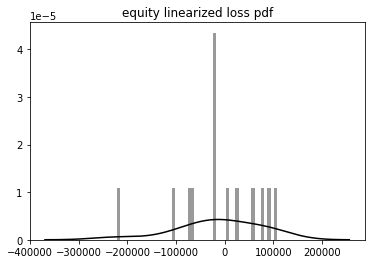

In [25]:
pdf_function1(linloss_equity,'equity linearized loss pdf')

In [0]:
bond1=[2.258,2.310,2.324,2.383,2.233,2.209,2.242,2.245,2.365,2.376,2.396,2.368,2.273,2.264,2.108,2.175,2.126,2.044,1.858,1.712,1.423,1.870,1.375,1.257,1.330,1.260]
bond3=[2.271,2.322,2.321,2.380,2.233,2.207,2.238,2.246,2.355,2.372,2.388,2.352,2.258,2.241,2.088,2.162,2.119,2.033,1.851,1.690,1.387,1.853,1.412,1.283,1.359,1.296]

In [0]:
bond30=[c*0.01 for c in bond3]
bond10=[c*0.01 for c in bond1]

In [28]:
len(bond10)

26

In [0]:
a30=15+9+30+31+31+29+31+30+31+30+31
c=a30/365+27
#2019.10.23 PERIOD

In [0]:
period_list1=[c,]
period_list2=[c,]
for i in range(25):
  a30=a30-7
  b1=a30/365+27
  b2=a30/365+24
  period_list1.append(b1)
  period_list2.append(b2)

period30=period_list1[12:]
period10=period_list2[12:]

In [0]:
yield_change10=[]
yield_change30=[]
for i in range(25):
  a=bond30[i+1]-bond30[i]
  b=bond10[i+1]-bond10[i]
  yield_change10.append(b)
  yield_change30.append(a)
#yield_change30
#yield_change10
yieldchange=[np.array(yield_change10),np.array(yield_change30)]

In [0]:
u_list=[]
for j in range(14):
  u=[]
  for i in range(2):
    a=yieldchange[i][j:(j+12)]
    u.append(a.mean())
  u_list.append(u)

In [33]:
cov_list=[]
bond_index=['bond10','bond30']
for j in range(14):
  df_temp={}
  for i in range(2):
    df_temp[bond_index[i]]=yieldchange[i][j:(j+12)]
  df = pd.DataFrame(df_temp)
  cov_mat=df.cov()  
  cov_list.append(cov_mat)

cov_list[0]

,bond10,bond30
bond10,5.024205e-07,4.852841e-07
bond30,4.852841e-07,4.721538e-07


In [0]:
bond_price10=[0.57239,0.572375,0.598495,0.584175,0.592505,0.604465,0.63292,0.64429,0.68259,0.62449,0.694705,0.73483,0.71203,0.732635]
bond_price30=[0.536425,0.537195,0.564690,0.548540,0.556420,0.569590,0.598885,0.613025,0.654810,0.586930,0.657060,0.702030,0.676945,0.698375]

In [35]:
share1=300000/0.56817  #2019.10.23 bond10 price=0.56817/share; 300000 capital
share2=300000/0.527875  #2019.10.23 bond30 price=0.527875/share; 300000 capital
linloss_bond=[]
for i in range(14):
  var = np.random.multivariate_normal(mean=u_list[i], cov=cov_list[i])
  a=share1*bond_price10[i]*(bond10[12+i]-(period10[i]*var[0]))+share2*bond_price30[i]*(bond30[12+i]-(period30[i]*var[1]))
  linloss_bond.append(-a)

linloss_bond

[-27876.99339179221,
 -37562.11524555991,
 729.0791724586205,
 5838.199285859189,
 -8427.372635466161,
 -27099.682416323376,
 -36638.45446700507,
 -1601.0411591905518,
 -23507.258086619186,
 -5910.671134593162,
 -2390.152011022244,
 -8141.542614212451,
 -68021.59465985816,
 -63503.5531288683]

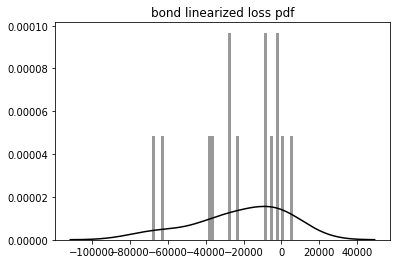

In [36]:
pdf_function1(linloss_bond,'bond linearized loss pdf')

In [37]:
magic_period=weektime[-26:]
magic_period

[Timestamp('2019-10-23 00:00:00', freq='C'),
 Timestamp('2019-10-30 00:00:00', freq='C'),
 Timestamp('2019-11-06 00:00:00', freq='C'),
 Timestamp('2019-11-13 00:00:00', freq='C'),
 Timestamp('2019-11-20 00:00:00', freq='C'),
 Timestamp('2019-11-27 00:00:00', freq='C'),
 Timestamp('2019-12-04 00:00:00', freq='C'),
 Timestamp('2019-12-11 00:00:00', freq='C'),
 Timestamp('2019-12-18 00:00:00', freq='C'),
 Timestamp('2019-12-24 00:00:00'),
 Timestamp('2019-12-31 00:00:00'),
 Timestamp('2020-01-08 00:00:00', freq='C'),
 Timestamp('2020-01-15 00:00:00', freq='C'),
 Timestamp('2020-01-22 00:00:00', freq='C'),
 Timestamp('2020-01-29 00:00:00', freq='C'),
 Timestamp('2020-02-05 00:00:00', freq='C'),
 Timestamp('2020-02-12 00:00:00', freq='C'),
 Timestamp('2020-02-19 00:00:00', freq='C'),
 Timestamp('2020-02-26 00:00:00', freq='C'),
 Timestamp('2020-03-04 00:00:00', freq='C'),
 Timestamp('2020-03-11 00:00:00', freq='C'),
 Timestamp('2020-03-18 00:00:00', freq='C'),
 Timestamp('2020-03-25 00:00:0

In [0]:
meli=[]
mmm=[]
spx=[]
for i in range(len(magic_period)):
  time=magic_period[i]
  a=MELI.loc[time]['Adj Close']
  b=MMM.loc[time]['Adj Close']
  c=10*SPY.loc[time]['Adj Close']
  meli.append(a)
  mmm.append(b)
  spx.append(c)

In [39]:
meli_price1=meli[12:]
meli_price1

[659.97998046875,
 663.1500244140625,
 668.6099853515625,
 675.8400268554688,
 699.8200073242188,
 742.739990234375,
 632.0499877929688,
 653.6300048828125,
 550.719970703125,
 452.1700134277344,
 482.6499938964844,
 447.3399963378906,
 544.0,
 588.6400146484375]

In [40]:
mmm_price1=mmm[12:]
mmm_price1

[178.1665802001953,
 176.4322967529297,
 160.54615783691406,
 160.87318420410156,
 162.3300018310547,
 159.33999633789062,
 148.9600067138672,
 153.97999572753906,
 147.24000549316406,
 137.02000427246094,
 131.5399932861328,
 133.13999938964844,
 148.99000549316406,
 145.16000366210938]

In [41]:
spx_price1=spx[12:]
spx_price1

[3262.7142333984375,
 3294.0301513671875,
 3247.1060180664062,
 3309.1412353515625,
 3354.4747924804688,
 3363.6209106445312,
 3096.7898559570312,
 3110.3103637695312,
 2727.56103515625,
 2385.9698486328125,
 2467.899932861328,
 2461.4999389648438,
 2740.2999877929688,
 2777.60009765625]

In [42]:
meli_sigma=[0.286,0.295,0.3,0.318,0.393,0.389,0.466,0.529,0.719,1.123,1.213,1.245,1.269,1.267]
mmm_sigma=[0.195,0.171,0.179,0.197,0.206,0.201,0.225,0.317,0.41,0.603,0.696,0.723,0.747,0.722]
a=16+29+31+30+31+19
b=a-19+30+17
meli_maturity=[a/365,]
mmm_maturity=[b/365,]
for i in range(13):
  a=a-7
  b=b-7
  meli_maturity.append(a/365)
  mmm_maturity.append(b/365)
spx_sigma=[0.078,0.072,0.089,0.105,0.108,0.103,0.148,0.232,0.317,0.522,0.586,0.615,0.632,0.617]
libor_list1=[0.01528,0.01533,0.01530,0.01575,0.01574,0.01577,0.01572,0.01088,0.01084,0.00380,0.00201,0.00109,0.00072,0.00066]
a=16+29+31+30+14
#2020.1.15--2020.5.14
spx_maturity=[a/365,]
for i in range(13):
  a=a-7
  spx_maturity.append(a/365)
spx_maturity

[0.3287671232876712,
 0.3095890410958904,
 0.29041095890410956,
 0.27123287671232876,
 0.25205479452054796,
 0.2328767123287671,
 0.2136986301369863,
 0.19452054794520549,
 0.17534246575342466,
 0.15616438356164383,
 0.136986301369863,
 0.1178082191780822,
 0.09863013698630137,
 0.07945205479452055]

In [0]:
from scipy.stats import norm
def delta_finder(S,T,K,r,sigma):
  n=len(S)
  delta_list=[]
  for i in range(n):
    d1= (np.log(S[i] / K) + (r[i] + 0.5 * sigma[i] ** 2) * T[i]) / (sigma[i] * np.sqrt(T[i]))
    delta=norm.cdf(d1)-1
    delta_list.append(delta)
  return delta_list

In [44]:
spx_delta=delta_finder(spx_price1,spx_maturity,2885,libor_list1,spx_sigma)
meli_delta=[i+1 for i in delta_finder(meli_price1,meli_maturity,640,libor_list1,meli_sigma)]
mmm_delta=[i+1 for i in delta_finder(mmm_price1,mmm_maturity,130,libor_list1,mmm_sigma)]
spx_delta

[-0.0019529002881616409,
 -0.00028227529103130866,
 -0.004912950677353978,
 -0.004477599463927895,
 -0.001982588263144902,
 -0.0007192336662726895,
 -0.13162449544672872,
 -0.209904310039277,
 -0.6338506103096607,
 -0.7923663591254462,
 -0.729160475227884,
 -0.7408356819984154,
 -0.563423903035916,
 -0.5520646270795397]

In [45]:
mmm_delta

[0.9918329080579453,
 0.9963915797522677,
 0.9676288566927,
 0.9588793258103406,
 0.9613386197417249,
 0.9553396800016629,
 0.8607837960748768,
 0.8402226744385954,
 0.7421382829590759,
 0.6288101320433375,
 0.5895450014910025,
 0.601608878601685,
 0.7070246367872849,
 0.6862830293672841]

In [0]:
meli_price1.append(601.05)
mmm_price1.append(143.61)
spx_price1.append(2791)

In [47]:
len(meli_price1)

15

In [48]:
option_loss=[]
for i in range(14):
  a=100*meli_delta[i]*(meli_price1[i+1]-meli_price1[i])
  b=200*mmm_delta[i]*(mmm_price1[i+1]-mmm_price1[i])
  c=-100*spx_delta[i]*(spx_price1[i+1]-spx_price1[i])
  d=a+b+c
  print(a,b,c)
  option_loss.append(d)

195.01282451463706 -344.0238789796446 6.115686522521818
340.69379110039193 -3165.763010138557 -1.324552338386995
462.8921822917758 63.28802995800155 30.47759627809096
1579.2496353061765 279.38246079228657 20.29855110983352
3003.840039622788 -574.8815507637031 1.8132986525406714
-8724.104800347883 -1983.2831931670266 -19.191387773829913
1165.8673673808448 864.2250398885305 177.96300190038662
-6073.192676535839 -1132.6185240833156 -8034.07337405673
-4134.243627324718 -1516.9308315544554 -21651.7782054282
1132.5062796157001 -689.1772863823857 6491.8642542990065
-1507.7010563193771 188.65512013654646 -466.6622591016104
3589.2945546019414 1907.1008795531795 20654.502431477547
2220.793874662146 -541.5811306992154 2101.577348283839
675.3894389490819 -212.74824175255938 739.7612090304594


In [49]:
option_loss

[-142.89536794248573,
 -2826.393771376552,
 556.6578085278683,
 1878.9306472082967,
 2430.7717875116255,
 -10726.579381288739,
 2208.055409169762,
 -15239.884574675885,
 -27302.952664307373,
 6935.193247532321,
 -1785.708195284441,
 26150.89786563267,
 3780.7900922467697,
 1202.4024062269818]

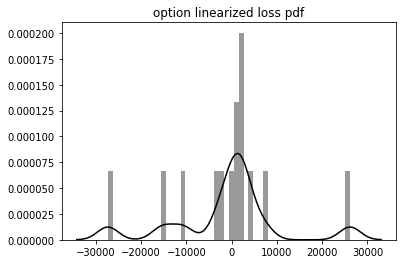

In [50]:
pdf_function1(option_loss,'option linearized loss pdf')

In [0]:
portfolio_linloss1=np.sum([option_loss,linloss_equity,linloss_bond], axis = 0)

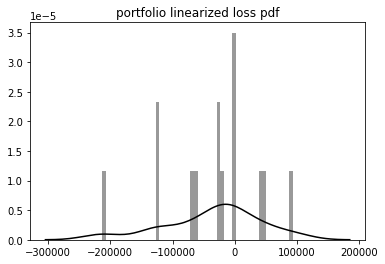

In [52]:
pdf_function1(portfolio_linloss1,'portfolio linearized loss pdf')

# **1.b) Portfolio t-distribution loss(2019.9.25-2020.4.22)**

In [53]:
t_period=weektime[-30:]
t_stock=week_stock[-30:]
len(t_stock)
t_period

[Timestamp('2019-09-25 00:00:00', freq='C'),
 Timestamp('2019-10-02 00:00:00', freq='C'),
 Timestamp('2019-10-09 00:00:00', freq='C'),
 Timestamp('2019-10-16 00:00:00', freq='C'),
 Timestamp('2019-10-23 00:00:00', freq='C'),
 Timestamp('2019-10-30 00:00:00', freq='C'),
 Timestamp('2019-11-06 00:00:00', freq='C'),
 Timestamp('2019-11-13 00:00:00', freq='C'),
 Timestamp('2019-11-20 00:00:00', freq='C'),
 Timestamp('2019-11-27 00:00:00', freq='C'),
 Timestamp('2019-12-04 00:00:00', freq='C'),
 Timestamp('2019-12-11 00:00:00', freq='C'),
 Timestamp('2019-12-18 00:00:00', freq='C'),
 Timestamp('2019-12-24 00:00:00'),
 Timestamp('2019-12-31 00:00:00'),
 Timestamp('2020-01-08 00:00:00', freq='C'),
 Timestamp('2020-01-15 00:00:00', freq='C'),
 Timestamp('2020-01-22 00:00:00', freq='C'),
 Timestamp('2020-01-29 00:00:00', freq='C'),
 Timestamp('2020-02-05 00:00:00', freq='C'),
 Timestamp('2020-02-12 00:00:00', freq='C'),
 Timestamp('2020-02-19 00:00:00', freq='C'),
 Timestamp('2020-02-26 00:00:0

In [0]:
stock_value=[]
for i in range(30):
  a=0
  for j in range(15):
    b=index_list[j]
    a+=t_stock[i].loc[b]['Adj Close']*t_stock[i].loc[b]['Share']
  stock_value.append(a)
#stock_value

In [0]:
stock_loss=[]
for i in range(29):
  a=stock_value[i+1]-stock_value[i]
  stock_loss.append(a)

In [56]:
bond10tprice=[0.57639,0.59218,0.59413,0.57203,0.56817,0.56815,0.55983,0.55275,0.57484,0.57900,0.57290,0.57439,0.55673,0.55915,0.55142,0.55335]+bond_price10
bond30tprice=[0.53646,0.55261,0.55369,0.53157,0.52788,0.52883,0.52192,0.51420,0.53706,0.54177,0.53544,0.53640,0.51922,0.52123,0.51292,0.51662]+bond_price30
len(bond10tprice)

30

In [0]:
share1=300000/0.57639
share2=300000/0.53646

In [0]:
bond_loss=[]
for i in range(29):
  a=share1*(bond10tprice[i+1]-bond10tprice[i])+share2*(bond30tprice[i+1]-bond30tprice[i])
  bond_loss.append(a)

In [59]:
len(bond_loss)

29

In [0]:
meli=[]
mmm=[]
spx=[]
for i in range(len(t_period)):
  time=t_period[i]
  a=MELI.loc[time]['Adj Close']
  b=MMM.loc[time]['Adj Close']
  c=10*SPY.loc[time]['Adj Close']
  meli.append(a)
  mmm.append(b)
  spx.append(c)

In [0]:
meli_sigma1=[0.421,0.396,0.396,0.391,0.316,0.311,0.381,0.374,0.365,0.358,0.371,0.367,0.298,0.282,0.27,0.275]+meli_sigma
mmm_sigma1=[0.216,0.204,0.204,0.214,0.207,0.219,0.224,0.222,0.217,0.197,0.193,0.186,0.187,0.19,0.19,0.196,]+mmm_sigma
spx_sigma1=[0.126,0.123,0.114,0.11,0.107,0.106,0.099,0.09,0.076,0.066,0.071,0.071,0.071,0.069,0.068,0.077]+spx_sigma

In [62]:
a=16+29+31+30+31+19+15+31+30+31+5
b=a-19+30+17
meli_maturity1=[a/365,]
mmm_maturity1=[b/365,]
for i in range(29):
  a=a-7
  b=b-7
  meli_maturity1.append(a/365)
  mmm_maturity1.append(b/365)
a=16+29+31+30+14+15+31+30+31+5
#2020.1.15--2020.5.14
spx_maturity1=[a/365,]
for i in range(29):
  a=a-7
  spx_maturity1.append(a/365)
spx_maturity1

[0.6356164383561644,
 0.6164383561643836,
 0.5972602739726027,
 0.5780821917808219,
 0.5589041095890411,
 0.5397260273972603,
 0.5205479452054794,
 0.5013698630136987,
 0.4821917808219178,
 0.46301369863013697,
 0.4438356164383562,
 0.4246575342465753,
 0.4054794520547945,
 0.3863013698630137,
 0.36712328767123287,
 0.34794520547945207,
 0.3287671232876712,
 0.3095890410958904,
 0.29041095890410956,
 0.27123287671232876,
 0.25205479452054796,
 0.2328767123287671,
 0.2136986301369863,
 0.19452054794520549,
 0.17534246575342466,
 0.15616438356164383,
 0.136986301369863,
 0.1178082191780822,
 0.09863013698630137,
 0.07945205479452055]

In [0]:
libor_list2=[0.01841,0.01851,0.01790,0.01826,0.01814,0.01804,0.01537,0.01539,0.01529,0.01540,0.01530,0.01525,0.01534,0.01533,0.01543,0.01533]+libor_list1

In [64]:
len(libor_list2)

30

In [0]:
spx_delta1=delta_finder(spx,spx_maturity1,2885,libor_list2,spx_sigma1)
meli_delta1=[i+1 for i in delta_finder(meli,meli_maturity1,640,libor_list2,meli_sigma1)]
mmm_delta1=[i+1 for i in delta_finder(mmm,mmm_maturity1,130,libor_list2,mmm_sigma1)]

In [0]:
option_loss1=[]
for i in range(29):
  a=100*meli_delta1[i]*(meli[i+1]-meli[i])
  b=200*mmm_delta1[i]*(mmm[i+1]-mmm[i])
  c=-100*spx_delta1[i]*(spx[i+1]-spx[i])
  d=a+b+c
  option_loss1.append(d)

In [67]:
option_loss1

[-5171.4527176857155,
 282.59513980236443,
 5509.203797632263,
 1345.3518448058835,
 1510.006725629094,
 -535.446712543237,
 427.89613267610093,
 680.5315583379402,
 2638.2620670534434,
 -1398.5609147950317,
 687.0624705573507,
 314.3705234909279,
 1995.4804271721746,
 -963.2051345843889,
 2777.0048412690085,
 1254.7716580071317,
 -142.89536794248573,
 -2826.393771376552,
 556.6578085278683,
 1878.9306472082967,
 2430.7717875116255,
 -10726.579381288739,
 2208.055409169762,
 -15239.884574675885,
 -27302.952664307373,
 6935.193247532321,
 -1785.708195284441,
 26150.89786563267,
 3780.7900922467697]

In [68]:
portfolio_actualloss=np.sum([option_loss1,stock_loss,bond_loss], axis = 0)
portfolio_actualloss

array([ -22295.74099716,   29016.08504651,   66231.23684833,
         -2436.0682607 ,  101255.7393476 ,   -2229.77508978,
         50571.33537766,   52721.03668011,   51685.40814876,
        -49324.96801291,   49955.24332521,   55726.56020303,
         75175.08441963,  -37195.17047854,  103953.40753702,
         87992.71306566,   61302.93411651,    8447.22808526,
        174505.25792702,  135074.45873224,  294309.42527405,
       -351433.01672441,   52310.15875793, -325336.26334793,
       -591831.96602437,  399056.23658538,  -26906.38620072,
        261288.86991762,  263901.96134053])

In [0]:
from scipy import stats

t_loss_list=[]
df_list=[]
for j in range(16):
  loss_for_estimate=portfolio_actualloss[j:j+13]
  para_t=stats.t.fit(loss_for_estimate)
  df_list.append(para_t[0])
  a=stats.t.rvs(loc = para_t[1], df = para_t[0], scale = para_t[2])
  t_loss_list.append(a)


In [70]:
t_loss_list

[-82.55589797895664,
 42944.92842363721,
 52126.01136258124,
 35753.15157165822,
 119558.02421231562,
 106702.83056004341,
 98322.01649080601,
 34606.35179909236,
 158951.75798722153,
 171690.4478498447,
 72667.30281371064,
 -132437.07604597192,
 116479.77522971982,
 101130.88676594647,
 249299.95667372472,
 323253.3837733869]

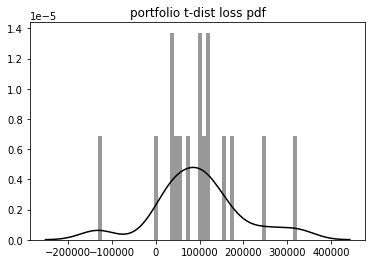

In [71]:
pdf_function1(t_loss_list,'portfolio t-dist loss pdf')

# **Now we work on 2.stress test**



In [238]:
B30= drd.get_data_yahoo('^TYX','05/07/2008','05/11/2009',interval='d')
tradingdays2=B30.index
tradingdays2
len(tradingdays2)

251

In [239]:
weektime2=[]
for i in tradingdays2:
  if i.weekday() == 2:
    weektime2.append(i)
len(weektime2)

51

In [240]:
nan_list=[]
nan_index=[]
for i in range(50):
  if weektime2[i+1]-weektime2[i] != pd.Timedelta('7 days'):
    nan_list.append(weektime2[i])
    nan_index.append(i)


#weektime: wednesday date list
#weektime[-1]
print(nan_index)
print(nan_list)

[32]
[Timestamp('2008-12-17 00:00:00')]


In [241]:
p1=pd.Timestamp(2008,12,23)
p2=pd.Timestamp(2008,12,30)
weektime2.insert(33,p1)
weektime2.insert(34,p2)
weektime2

[Timestamp('2008-05-07 00:00:00'),
 Timestamp('2008-05-14 00:00:00'),
 Timestamp('2008-05-21 00:00:00'),
 Timestamp('2008-05-28 00:00:00'),
 Timestamp('2008-06-04 00:00:00'),
 Timestamp('2008-06-11 00:00:00'),
 Timestamp('2008-06-18 00:00:00'),
 Timestamp('2008-06-25 00:00:00'),
 Timestamp('2008-07-02 00:00:00'),
 Timestamp('2008-07-09 00:00:00'),
 Timestamp('2008-07-16 00:00:00'),
 Timestamp('2008-07-23 00:00:00'),
 Timestamp('2008-07-30 00:00:00'),
 Timestamp('2008-08-06 00:00:00'),
 Timestamp('2008-08-13 00:00:00'),
 Timestamp('2008-08-20 00:00:00'),
 Timestamp('2008-08-27 00:00:00'),
 Timestamp('2008-09-03 00:00:00'),
 Timestamp('2008-09-10 00:00:00'),
 Timestamp('2008-09-17 00:00:00'),
 Timestamp('2008-09-24 00:00:00'),
 Timestamp('2008-10-01 00:00:00'),
 Timestamp('2008-10-08 00:00:00'),
 Timestamp('2008-10-15 00:00:00'),
 Timestamp('2008-10-22 00:00:00'),
 Timestamp('2008-10-29 00:00:00'),
 Timestamp('2008-11-05 00:00:00'),
 Timestamp('2008-11-12 00:00:00'),
 Timestamp('2008-11-

**Use CYTK TO SUBSTITUTE TSLA; USE ADS TO SUBSTITUTE YELP**

In [0]:
AAPL= drd.get_data_yahoo('AAPL','05/07/2008','05/11/2009',interval='d')
CYTK= drd.get_data_yahoo('CYTK','05/07/2008','05/11/2009',interval='d')
GILD= drd.get_data_yahoo('GILD','05/07/2008','05/11/2009',interval='d')
MELI= drd.get_data_yahoo('MELI','05/07/2008','05/11/2009',interval='d')
MSFT= drd.get_data_yahoo('MSFT','05/07/2008','05/11/2009',interval='d')
DIS= drd.get_data_yahoo('DIS','05/07/2008','05/11/2009',interval='d')
NVDA= drd.get_data_yahoo('NVDA','05/07/2008','05/11/2009',interval='d')
TCO= drd.get_data_yahoo('TCO','05/07/2008','05/11/2009',interval='d')
MMM= drd.get_data_yahoo('MMM','05/07/2008','05/11/2009',interval='d')
INCY= drd.get_data_yahoo('INCY','05/07/2008','05/11/2009',interval='d')
IBM= drd.get_data_yahoo('IBM','05/07/2008','05/11/2009',interval='d')
EPC= drd.get_data_yahoo('EPC','05/07/2008','05/11/2009',interval='d')
SPY= drd.get_data_yahoo('SPY','05/07/2008','05/11/2009',interval='d')
ADS= drd.get_data_yahoo('ADS','05/07/2008','05/11/2009',interval='d')
VTI= drd.get_data_yahoo('VTI','05/07/2008','05/11/2009',interval='d')

In [243]:
for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=ADS.loc[a,'Adj Close']
  ADS.loc[a,'Adj Close']=b/2.2
ADS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,59.430000,57.400002,58.000000,58.230000,1827700,25.263094
2008-05-08,59.099998,57.689999,59.090000,58.500000,778600,25.380239
2008-05-09,59.669998,57.849998,57.849998,59.110001,956400,25.644882
2008-05-12,59.470001,58.840000,58.930000,59.250000,1168900,25.705625
2008-05-13,59.930000,56.730000,59.250000,59.330002,1249100,25.740329
...,...,...,...,...,...,...
2009-05-05,42.450001,41.160000,41.590000,42.099998,1037200,18.265091
2009-05-06,42.900002,41.680000,42.830002,42.380001,1825500,18.386572
2009-05-07,43.480000,41.380001,42.840000,41.910000,1519700,18.182661


In [0]:
stock_list=[AAPL,CYTK,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,ADS,VTI]
index_list=['AAPL','CYTK','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','ADS','VTI']


In [0]:
from datetime import date
total_num=len(tradingdays2)
date_list2=[]
for i in range(total_num-1):
  if tradingdays2[i].day > tradingdays2[i+1].day:
    date_list2.append(tradingdays2[i])

def new_portfolio():
    res = pd.DataFrame(columns=['Share', 'Adj Close'],index=pd.Series(index_list))
    return res

my_port = new_portfolio()
update_list=[]

for j in range(len(date_list2)):
  b=date_list2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a,'Adj Close']=stock_list[i].loc[b,'Adj Close']
  update_list.append(my_port)

for i in range(len(index_list)):
    a=index_list[i]
    update_list[0].loc[a,'Share']=(400000/15)/update_list[0].loc[a,'Adj Close']

def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a,'Share']*portfolio2.loc[a,'Adj Close']
  return res

for i in range(len(update_list)-1):
  to_value=total_value(update_list[i],update_list[i+1])
  for j in range(len(index_list)):
    a=index_list[j]
    update_list[i+1].loc[a,'Share']=(to_value/15)/update_list[i+1].loc[a,'Adj Close']

In [246]:
len(update_list)

12

In [0]:
week_stock2=[] #所有Wednesday的portfolio

for j in range(len(weektime2)):
  b=weektime2[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  week_stock2.append(my_port)
week_stock2

m=0
for i in range(len(week_stock2)):
  if weektime2[i].month <= date_list2[m].month:
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']
  else:
    m+=1
    for j in range(len(index_list)):
      a=index_list[j]
      week_stock2[i].loc[a]['Share']=update_list[m+1].loc[a]['Share']

In [248]:
len(week_stock2)

53

In [249]:
stock_value=[]
for j in range(len(week_stock2)):
  v=0
  for i in range(len(index_list)):
    a=index_list[i]
    v+=week_stock2[j].loc[a,'Adj Close']*week_stock2[j].loc[a,'Share']
  stock_value.append(v)

len(stock_value)
  

53

In [0]:
stock_loss=[]
for i in range(52):
  a=stock_value[i+1]-stock_value[i]
  stock_loss.append(-a)

In [251]:
np.mean(np.array(stock_loss))

2500.705300410661

In [0]:
bond30= drd.get_data_yahoo('^TYX','05/07/2008','05/11/2009',interval='d')

In [253]:
for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=bond30.loc[a,'Adj Close']
  bond30.loc[a,'Adj Close']=b*0.01
bond30

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,4.688,4.607,4.646,4.622,0.0,0.04622
2008-05-08,4.636,4.557,4.625,4.564,0.0,0.04564
2008-05-09,4.544,4.490,4.501,4.524,0.0,0.04524
2008-05-12,4.539,4.475,4.537,4.522,0.0,0.04522
2008-05-13,4.621,4.501,4.504,4.619,0.0,0.04619
...,...,...,...,...,...,...
2009-05-05,4.107,4.032,4.049,4.053,0.0,0.04053
2009-05-06,4.106,4.037,4.088,4.082,0.0,0.04082
2009-05-07,4.307,4.132,4.144,4.261,0.0,0.04261


In [254]:
week_bond=[]
for i in range(len(weektime2)):
  a=weektime2[i]
  b=bond30.loc[a,'Adj Close']
  week_bond.append(b)
week_bond

[0.04622000217437744,
 0.0463700008392334,
 0.04558000087738037,
 0.04697000026702881,
 0.046849999427795413,
 0.04702000141143799,
 0.04730000019073487,
 0.04657000064849853,
 0.04502999782562256,
 0.04427999973297119,
 0.045819997787475586,
 0.04699999809265137,
 0.04638000011444092,
 0.04690000057220459,
 0.04576000213623047,
 0.04442999839782715,
 0.04382999897003174,
 0.04317999839782715,
 0.04224999904632568,
 0.04080999851226807,
 0.04377999782562256,
 0.04248000144958496,
 0.040630002021789555,
 0.04248000144958496,
 0.04087999820709229,
 0.0423799991607666,
 0.041539998054504396,
 0.04190000057220459,
 0.039719998836517334,
 0.035629999637603764,
 0.031840000152587894,
 0.030950000286102296,
 0.026649999618530273,
 0.02632999897003174,
 0.025829999446868895,
 0.03065999984741211,
 0.028949999809265138,
 0.03138000011444092,
 0.03434000015258789,
 0.036730000972747805,
 0.034519999027252196,
 0.03525000095367432,
 0.036010000705719,
 0.03697999954223633,
 0.03657000064849854,
 

In [255]:
a=27
maturity_list=[a,]
for i in range(len(weektime2)-1):
  a=a-7/365
  maturity_list.append(a)
len(maturity_list)


53

In [0]:
bond_price=[]
for i in range(len(weektime2)):
  a=np.exp(-maturity_list[i]*week_bond[i])
  bond_price.append(a)

In [257]:
bond_price

[0.2870955882103808,
 0.28618960451409126,
 0.2926108383133809,
 0.28210170313915467,
 0.2832696489075728,
 0.28223047041576943,
 0.28036659469094216,
 0.2861788956606537,
 0.29852510993664105,
 0.3048555736561417,
 0.2927745138850059,
 0.2839137226643739,
 0.288925546207948,
 0.2851878655250475,
 0.29427699052823186,
 0.30518756495450894,
 0.31037911812203806,
 0.31607299531147653,
 0.32427445349404516,
 0.33722683734295544,
 0.3118391985298803,
 0.3230811803473769,
 0.33964051376146454,
 0.3236080282023702,
 0.33792072500393944,
 0.32499652154085984,
 0.3325826585790118,
 0.3296895414669211,
 0.3495492284404695,
 0.38977179449928234,
 0.4311233219796787,
 0.4416446866270369,
 0.4950012845128927,
 0.49945072769763,
 0.5063296143138778,
 0.44608757221315637,
 0.4668895318849006,
 0.4382380167792822,
 0.4056947939996242,
 0.38127362028285344,
 0.4043158584706299,
 0.3969150894252205,
 0.38935463077798604,
 0.3798555795176408,
 0.384223467721317,
 0.39313069794125305,
 0.3787802969163156

In [258]:
bondshare=600000/bond_price[0]
bond_loss=[]
for i in range(len(weektime2)-1):
  a=bondshare*(bond_price[i+1]-bond_price[i])
  bond_loss.append(-a)
bond_loss

[1893.4119509192096,
 -13419.712589768349,
 21963.002440550063,
 -2440.885509314587,
 2171.77525774137,
 3895.3069319785695,
 -12147.106138292163,
 -25802.307209834624,
 -13230.012538252731,
 25248.161798187353,
 18518.13455413789,
 -10474.19134821707,
 7811.364931518766,
 -18995.328475456656,
 -22801.96883753278,
 -10849.807619596297,
 -11899.612721180645,
 -17140.19689475411,
 -27069.138741523766,
 53057.53175378929,
 -23494.575909523006,
 -34607.28919725471,
 33506.231828291,
 -29912.051712367684,
 27010.244658184445,
 -15854.239527901618,
 6046.314671970533,
 -41504.68580310349,
 -84060.99092544362,
 -86420.4031935754,
 -21988.56077087799,
 -111509.7550995942,
 -9298.874731875234,
 -14376.159506582924,
 125899.61930709293,
 -43473.93800388347,
 59878.69465543206,
 68011.96002178335,
 51037.719950350154,
 -48155.88772661598,
 15466.8396506034,
 15800.57435440823,
 19852.031832793786,
 -9128.433280852987,
 -18615.18724573837,
 29990.84962828817,
 -48037.16708346496,
 34825.5318353067

In [259]:
np.mean(np.array(bond_loss))

-2365.7838517171867

In [0]:
libor2008=[0.02211,0.02203,0.02109,0.02429,0.02216,0.02095,0.02091,0.02105,0.02444,0.02328,0.02194,0.02098,0.02350,0.02193,0.02184,0.02096,0.02150,0.02163,0.02130,0.05031,0.02688,0.03794,0.05375,0.02144,0.01119,0.01140,0.00323,0.00383,0.00438,0.00988,0.00881,0.00125,0.00133,0.00118,0.00139,0.00108,0.00105,0.00188,0.00224,0.00319,0.00301,0.00304,0.00270,0.00313,0.00329,0.00309,0.00288,0.00296,0.00260,0.00263,0.00206,0.00228,0.00242]

In [261]:
len(libor2008)

53

In [262]:
MELI

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,57.560001,54.000000,55.560001,56.049999,1631600,54.312321
2008-05-08,57.709999,54.270000,56.360001,55.000000,1597600,53.294876
2008-05-09,55.980000,53.650002,54.639999,54.020000,1059600,52.345264
2008-05-12,53.990002,50.110001,53.799999,52.259998,1473600,50.639824
2008-05-13,56.560001,52.590000,52.590000,55.860001,2504400,54.128220
...,...,...,...,...,...,...
2009-05-05,28.070000,27.100000,27.160000,27.889999,587300,27.025349
2009-05-06,29.580000,27.889999,28.299999,28.940001,1223200,28.042793
2009-05-07,27.750000,22.030001,27.290001,23.580000,3495900,22.848967


In [0]:
meli_sigma=drd.get_data_yahoo('MELI','08/09/2007','05/06/2009',interval='d')
len(meli_sigma)
tradingdays3=meli_sigma.index
vol=[]
for i in range(len(weektime2)):
  a=list(tradingdays3).index(weektime2[i])
  b=np.log(np.array(meli_sigma[:a]['Adj Close'])).std()
  vol.append(b)
vol

**K for MELI is 45, maturity date is 2009/06/01 (covered call)**

**K for MMM is 45, maturity date is 2009/06/01 (covered call)**

**K for SPX is 1040, maturity date is 2009/06/01 (PUT)**

In [0]:
a=24+30+31+31+30+31+30+31+31+28+31+30+31+1
#2008.05.07---2009.06.01
maturity=[a/365,]
for i in range(len(weektime2)-1):
  a=a-7
  maturity.append(a/365)

In [0]:
import scipy.stats as ss
meli_option=[]
for i in range(len(weektime2)):
  a=weektime2[i]
  d1 = (np.log(MELI.loc[a,'Adj Close'] / 45) + (libor2008[i] + 0.5 * vol[i] ** 2) * maturity[i]) / (vol[i] * np.sqrt(maturity[i]))
  d2 = d1 - vol[i] * np.sqrt(maturity[i])
  price=(otype * MELI.loc[a,'Adj Close'] * ss.norm.cdf(otype * d1) - otype * np.exp(-libor2008[i] * maturity[i]) * 45 * ss.norm.cdf(otype * d2))
  meli_option.append(price)


In [294]:
meli_option

[11.585747023905796,
 9.838117507086672,
 7.226866749142065,
 3.8764643882404144,
 4.483161673690237,
 1.0496467495940403,
 1.4695615915343012,
 1.1688172133967694,
 0.22842408287165572,
 0.12284534986347184,
 0.3293147957014382,
 0.2886941649893986,
 0.22121122523165315,
 0.3972354709894157,
 0.2976466679570282,
 0.06786532420284486,
 0.040826258345392774,
 0.022068002096400974,
 0.003909933696076548,
 0.0011643035889184056,
 0.001253653521949255,
 5.54764591628894e-05,
 5.111994817840761e-05,
 1.7965554336157592e-05,
 1.2859969032074116e-07,
 1.3099722568054024e-07,
 2.147148748602972e-06,
 4.505817830637363e-08,
 9.345305805794172e-09,
 6.970297963196118e-06,
 5.2968440449638565e-06,
 0.00047402942386449987,
 0.00015259596883176064,
 9.200626827953785e-05,
 0.00031712098133878774,
 0.0007889958940395913,
 5.9742257047783014e-05,
 9.34917504826055e-06,
 2.4819627826401795e-05,
 1.3801917820791047e-05,
 0.00020201740333210868,
 8.339527200226674e-06,
 2.3060305779398803e-05,
 5.539801

In [295]:
a=weektime2[0]
share_meli=400000/(15*MELI.loc[a,'Adj Close'])
share_meli
meli_loss=[]
for i in range(len(meli_option)-1):
  loss=500*(meli_option[i+1]-meli_option[i])
  meli_loss.append(loss)

490.9874282380937

In [297]:
meli_loss

[-873.8147584095622,
 -1305.6253789723035,
 -1675.2011804508254,
 303.34864272491126,
 -1716.7574620480982,
 209.95742097013047,
 -150.37218906876592,
 -470.1965652625568,
 -52.78936650409194,
 103.23472291898317,
 -20.310315356019792,
 -33.74146987887272,
 88.01212287888127,
 -49.794401516193744,
 -114.89067187709168,
 -13.519532928726042,
 -9.3791281244959,
 -9.079034200162212,
 -1.372815053579071,
 0.04467496651542474,
 -0.5990885313931829,
 -0.0021782554922408943,
 -0.01657719692112501,
 -0.008918477322918426,
 1.198767679899541e-06,
 0.0010080757614612157,
 -0.001051045285148299,
 -1.785643625028973e-05,
 0.003480476328695162,
 -0.0008367269591161308,
 0.234366289909768,
 -0.16071672751636962,
 -0.030294850276111392,
 0.11255735652962494,
 0.23593745635040178,
 -0.3646268184959041,
 -0.025196540999761232,
 0.007735226389070623,
 -0.005508855002805374,
 0.09410774275565882,
 -0.096838938065941,
 0.007360389289586065,
 -0.008760252023067527,
 0.0044998160287169145,
 -0.0037077961622

In [0]:
def vol_finder(sigma,weektime):
  len(sigma)
  tradingdays3=sigma.index
  vol=[]
  for i in range(len(weektime)):
    a=list(tradingdays3).index(weektime[i])
    b=np.log(np.array(sigma[:a]['Adj Close'])).std()
    vol.append(b)
  return vol
  
def option_finder(stock,libor,vol,k,maturity,weektime,otype):
  option=[]
  for i in range(len(weektime)):
    a=weektime[i]
    d1 = (np.log(stock.loc[a,'Adj Close'] / k) + (libor[i] + 0.5 * vol[i] ** 2) * maturity[i]) / (vol[i] * np.sqrt(maturity[i]))
    d2 = d1 - vol[i] * np.sqrt(maturity[i])
    price=(otype * stock.loc[a,'Adj Close'] * ss.norm.cdf(otype * d1) - otype * np.exp(-libor[i] * maturity[i]) * k * ss.norm.cdf(otype * d2))
    option.append(price)
  return option

In [0]:
mmm_sigma=drd.get_data_yahoo('MMM','08/09/2007','05/06/2009',interval='d')
mmm_vol=vol_finder(mmm_sigma,weektime2)
spx_sigma=drd.get_data_yahoo('SPY','08/09/2007','05/06/2009',interval='d')
spx_vol=vol_finder(spx_sigma,weektime2)

In [311]:
MMM

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,78.129997,76.489998,77.949997,76.680000,4089200.0,55.537189
2008-05-08,77.360001,76.470001,77.120003,76.949997,3796000.0,55.732716
2008-05-09,76.669998,75.820000,75.989998,76.320000,3871600.0,55.276447
2008-05-12,77.669998,75.949997,76.669998,77.669998,3552100.0,56.254223
2008-05-13,78.339996,76.910004,77.720001,77.180000,3407400.0,55.899319
...,...,...,...,...,...,...
2009-05-05,58.759998,57.779999,58.419998,58.430000,4302400.0,43.712578
2009-05-06,59.360001,57.830002,58.740002,59.139999,5067100.0,44.243744
2009-05-07,59.560001,57.970001,59.009998,58.770000,5627600.0,43.966942


In [310]:
for i in range(len(tradingdays2)):
  a=tradingdays2[i]
  b=SPY.loc[a,'Adj Close']
  SPY.loc[a,'Adj Close']=b*10
SPY

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-05-07,142.039993,139.130005,141.889999,139.520004,199267300.0,1089.219208
2008-05-08,140.320007,138.979996,139.740005,139.160004,178321200.0,1086.408615
2008-05-09,139.389999,138.449997,138.600006,138.899994,152588200.0,1084.379044
2008-05-12,140.559998,138.729996,139.250000,140.460007,147865900.0,1096.557922
2008-05-13,140.889999,139.729996,140.800003,140.479996,159132200.0,1096.714096
...,...,...,...,...,...,...
2009-05-05,90.930000,89.839996,90.570000,90.570000,243036300.0,725.680237
2009-05-06,92.199997,90.610001,91.680000,92.139999,291941000.0,738.259506
2009-05-07,93.150002,90.279999,93.010002,90.860001,317728000.0,728.003845


In [318]:
mmm_option=option_finder(MMM,libor2008,mmm_vol,45,maturity,weektime2,1)
spx_option=option_finder(SPY,libor2008,spx_vol,1040,maturity,weektime2,-1)
spx_option

[2.105232846713278,
 1.326253796310077,
 1.9454931580232113,
 1.6878797699780392,
 2.652301677021242,
 8.628419108060086,
 7.916300289916649,
 12.35729493266274,
 35.07345821585159,
 44.74905576793094,
 51.90657437226139,
 29.13292963381423,
 26.63713027901224,
 25.975507881055364,
 27.791642791927075,
 33.26330141538676,
 27.991508624357493,
 31.674076529078434,
 56.9607989747592,
 89.49365773739498,
 83.54312840666546,
 98.69040230021369,
 234.99006580051753,
 315.72327968506306,
 317.6723106247325,
 298.51146038199056,
 279.0190584546639,
 360.571745793256,
 394.4353369187397,
 332.6552198667641,
 346.41795400527405,
 328.296770163415,
 321.34193244652124,
 354.02698720863,
 331.60749608211756,
 318.2425680453596,
 368.3882389959624,
 370.64500737354126,
 343.98536788966203,
 376.011543014862,
 373.98354676509996,
 410.39090347512627,
 427.72805998989804,
 468.56371634861785,
 461.34921056469443,
 403.46250438058473,
 386.8346479901114,
 390.0030818341545,
 378.3393528283815,
 356.5

In [319]:
a=weektime2[0]
share_mmm=400000/(15*MMM.loc[a,'Adj Close'])
share_mmm

480.15873533753137

In [320]:
mmm_loss=[]
for i in range(len(mmm_option)-1):
  loss=500*(mmm_option[i+1]-mmm_option[i])
  mmm_loss.append(loss)
mmm_loss

[369.07291207266724,
 -434.7115710148941,
 346.52686024302784,
 -253.50245119912174,
 -432.5466421144988,
 -363.1973102950923,
 -636.0854856856264,
 -1420.1277709362935,
 26.693621757853947,
 -31.222911621899385,
 748.2984965411283,
 218.35173279630027,
 146.73151734167078,
 406.2148372544989,
 -666.3784406661257,
 10.947686432054127,
 32.795574258052795,
 -791.8723452878069,
 491.58604129891967,
 -467.04202145621207,
 -275.14102729641013,
 -2512.1885196773883,
 -244.4104175588351,
 237.51332043605024,
 756.5298610982944,
 447.6178085621143,
 -1072.0080219518495,
 -22.475103696200982,
 1730.5476539193983,
 -1398.2313340186874,
 -486.72307792706613,
 124.97180655293505,
 -268.8101551840938,
 120.05661111740685,
 85.22093809875653,
 -227.6078821266827,
 -30.331529314536088,
 47.158005221558774,
 -98.88787761683143,
 2.5754336218553053,
 -9.367695438827969,
 -0.17340022388981186,
 -0.2574690082130606,
 0.39260824933844185,
 2.5321729372129247,
 -1.0056608671742129,
 3.4079040074326272,
 1

In [321]:
a=weektime2[0]
share_spx=400000/(15*SPY.loc[a,'Adj Close'])
share_spx

24.482369092092377

In [324]:
spx_loss=[]
for i in range(len(spx_option)-1):
  loss=100*(spx_option[i+1]-spx_option[i])
  spx_loss.append(-loss)
spx_loss

[77.89790504032013,
 -61.92393617131344,
 25.76133880451721,
 -96.4421907043203,
 -597.6117431038845,
 71.21188181434377,
 -444.0994642746091,
 -2271.616328318885,
 -967.5597552079353,
 -715.7518604330448,
 2277.364473844716,
 249.57993548019886,
 66.16223979568758,
 -181.61349108717104,
 -547.1658623459689,
 527.179279102927,
 -368.25679047209405,
 -2528.6722445680766,
 -3253.2858762635783,
 595.0529330729523,
 -1514.7273893548231,
 -13629.966350030383,
 -8073.321388454553,
 -194.90309396694556,
 1916.0850242741958,
 1949.2401927326682,
 -8155.268733859213,
 -3386.359112548371,
 6178.011705197559,
 -1376.2734138509927,
 1812.1183841859079,
 695.4837716893735,
 -3268.5054762108734,
 2241.949112651241,
 1336.4928036757988,
 -5014.5670950602835,
 -225.6768377578851,
 2665.963948387923,
 -3202.6175125199984,
 202.79962497620545,
 -3640.7356710026306,
 -1733.7156514771777,
 -4083.5656358719802,
 721.4505783923414,
 5788.67061841097,
 1662.7856390473312,
 -316.8433844043079,
 1166.372900577

In [325]:
stress_loss=np.sum([meli_loss,spx_loss,mmm_loss,bond_loss,stock_loss], axis = 0)
stress_loss

array([  -3342.54824451,   -4716.29839914,   18770.28135656,
        -14902.00242967,   22772.14798613,    -485.49872364,
         -6697.80660336,   -4296.35515311,   -1117.90280883,
         14250.05193989,    7889.56110898,   -9465.43029546,
         -7608.09944768,  -17654.83990464,  -19693.51491371,
        -11155.3414095 ,  -19539.98472796,   -5137.72569336,
         -2516.79106781,   43358.67973558,  -13003.64141029,
         12966.9414903 ,   51699.29016285,  -35402.73618198,
         39018.54418172,  -23020.65998162,   27977.24540098,
        -26330.58998022, -102115.50096643,  -80881.98252628,
        -40087.12232833, -110663.91259813,   -5357.97566919,
        -20508.14228432,  118925.05523577,  -24690.61971688,
         59849.00669189,   64077.97436113,   57602.60033675,
        -49924.73292912,   26000.89010411,   20029.85230136,
         23717.60802173,  -12401.22737517,  -27536.72264451,
         25519.1498343 ,  -48882.2344188 ,   27065.71745932,
         -9561.47464798,

In [326]:
stress_loss.sort()
stress_loss

array([-110663.91259813, -102115.50096643,  -80881.98252628,
        -49924.73292912,  -48882.2344188 ,  -40087.12232833,
        -35402.73618198,  -27536.72264451,  -26330.58998022,
        -24690.61971688,  -23020.65998162,  -20508.14228432,
        -19693.51491371,  -19539.98472796,  -17654.83990464,
        -14902.00242967,  -13003.64141029,  -12401.22737517,
        -11155.3414095 ,   -9561.47464798,   -9465.43029546,
         -7608.09944768,   -6697.80660336,   -5357.97566919,
         -5137.72569336,   -4716.29839914,   -4296.35515311,
         -3342.54824451,   -2516.79106781,   -1117.90280883,
          -485.49872364,    1297.49771175,    7889.56110898,
         12966.9414903 ,   14250.05193989,   18770.28135656,
         20029.85230136,   22772.14798613,   23717.60802173,
         25519.1498343 ,   26000.89010411,   27065.71745932,
         27977.24540098,   29080.14217986,   32591.92822975,
         39018.54418172,   43358.67973558,   51699.29016285,
         57602.60033675,

In [328]:
0.99*53


52.47

**SVAR0.99 = 118925.06**

**SVAR0.95 = 59849.01**

# **Now we work on 3.reduce risk**

In [0]:
spx_delta1=delta_finder(spx,spx_maturity1,2885,libor_list2,spx_sigma1)
meli_delta1=[i+1 for i in delta_finder(meli,meli_maturity1,640,libor_list2,meli_sigma1)]
mmm_delta1=[i+1 for i in delta_finder(mmm,mmm_maturity1,130,libor_list2,mmm_sigma1)]

In [0]:
meli_delta1=[i+1 for i in delta_finder(meli,meli_maturity1,640,libor_list2,meli_sigma1)]

In [278]:
meli=[MELI.loc[a,'Adj Close'] for a in weektime2]
meli_delta=[i+1 for i in delta_finder(meli,maturity,45,libor2008,vol)]
meli_delta

[0.8411953623356628,
 0.7985616251951313,
 0.7106982713018731,
 0.5310653077990004,
 0.5774959588712881,
 0.24031177687377148,
 0.3039940425744636,
 0.2634358849060181,
 0.08048873249272359,
 0.04923365520951195,
 0.10626323244254077,
 0.09663996699964028,
 0.07920644884313366,
 0.12464547740338427,
 0.10101052341049255,
 0.031359268235734095,
 0.02065215247212704,
 0.01235931050250394,
 0.0027821517191251033,
 0.0009716787369820068,
 0.0010214457655695064,
 6.206327066160533e-05,
 5.782862248160381e-05,
 2.1872596445704495e-05,
 2.2988812842239525e-07,
 2.3909497604002183e-07,
 3.170025881016336e-06,
 9.22480857257213e-08,
 2.2165104196503194e-08,
 9.757666784238062e-06,
 7.659291683337344e-06,
 0.0004153601520108241,
 0.00015342464287426694,
 9.78656213561635e-05,
 0.00029085727195088396,
 0.0006433860526943169,
 6.592118649850764e-05,
 1.2421710753773851e-05,
 2.9836222238288634e-05,
 1.7521370968998085e-05,
 0.0001928049056374448,
 1.0962213894960549e-05,
 2.74055650014704e-05,
 7.

In [281]:
meli_loss=[]
for i in range(len(meli)-1):
  a=500*meli_delta[i]*(meli[i+1]-meli[i])
  meli_loss.append(a)
meli_loss

[-880.3247578141826,
 -1342.550965023749,
 -1900.7160908974315,
 355.07436025959964,
 -2355.8827624225737,
 211.90410209329636,
 -129.61180933946204,
 -746.6603591549504,
 -67.0742251974051,
 69.65261429766863,
 -10.297209785925453,
 -32.77502542916496,
 78.28595306066065,
 -40.46208903448902,
 -177.1603873846039,
 -15.345518379256188,
 -10.606342167839918,
 -16.9462448545723,
 -3.0328827632321618,
 0.2118495316077628,
 -1.9498604933282875,
 -0.03247523424155072,
 -0.030259411741219915,
 -0.041859133678316465,
 -0.00015147751333081423,
 0.00011931650503858797,
 -0.0048226460228882285,
 -7.016962065874483e-05,
 3.1035618737393884e-05,
 -0.0020328627561099297,
 0.01491789302574059,
 -0.22337844265147772,
 -0.0260169435489265,
 0.06922713876849922,
 0.1986963175788698,
 -0.7792969508161778,
 -0.04183988239879517,
 0.006018318007272242,
 -0.003180265240898288,
 0.02487302091742222,
 -0.22606129531546726,
 0.006957657702971045,
 -0.007568484228792954,
 0.005026465849986567,
 0.0015605888183